# Model Training and Testing

In [4]:
# Import Libraries
from catboost import CatBoostClassifier
from pycaret.classification import *
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, \
    ConfusionMatrixDisplay, f1_score, matthews_corrcoef, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
from xgboost import XGBClassifier

import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import pycaret
import pandas as pd

# Defining the seed
RANDOM_STATE = 42

In [2]:
# Functions
def divide_X_y(df): # Split the DataFrame into X (features) and y (labels)
    # Selecting only the features
    X = df.drop(columns='output')
    # Selecting the labels
    y = df['output']
    return X, y



def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred) # Generate the confusion matrix
    # Display the confusion matrix
    cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,5)) # Plot size
    plt.rc('font', **{'size':14}) # Font size
    cm_p.plot(ax=ax) # Plot the matrix

    

def classification_evaluation(model, X, y, k):    
    # Lists
    predicted_class = []
    original_class = []

    # K-Fold Stratified Cross Validation
    skf = StratifiedKFold(k)
    
    start = time() # Time count

    # Model training and validation for every 'k' part on all data
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predicting with validation data
        y_pred = model.predict(X_val)
        # Adding to lists
        predicted_class.extend(y_pred)
        original_class.extend(y_val)

    # Time spent on training
    total_time = time() - start

    # Results
    print('\t\t\tModel Evaluation\n\n')
    print(classification_report(original_class, predicted_class))
    print('Accuracy: ' + str(round(accuracy_score(original_class, predicted_class), 5)))
    print('F1-Score: ' + str(round(f1_score(original_class, predicted_class), 5)))
    print('Recall: ' + str(round(recall_score(original_class, predicted_class, average='binary'), 5)))
    print('Precision: ' + str(round(precision_score(original_class, predicted_class), 5)))
    print('ROC AUC: ' + str(round(roc_auc_score(original_class, predicted_class), 5)))
    print('Kappa Score: ' + str(round(cohen_kappa_score(original_class, predicted_class), 5)))
    print('MCC Score: ' + str(round(matthews_corrcoef(original_class, predicted_class), 5)))
    print('Total Time: ' + str(round(total_time, 5)) + ' seconds\n')
    print('Confusion Matrix:\n')
    print(confusion_matrix(original_class, predicted_class))

## Training and Validation

In [5]:
# Loading training/validation data
train_df = pd.read_csv('../Heart_Attack/train_data.csv')

In [6]:
# Label count
train_df['output'].value_counts()

1    110
0    110
Name: output, dtype: int64

In [8]:
# Split in X and y
X, y = divide_X_y(train_df)

### Model Generation in the Conventional Form

In [9]:
models = [ # Models
    LogisticRegression(random_state=RANDOM_STATE), # LogisticRegression
    KNeighborsClassifier(), # KNeighborsClassifier
    DecisionTreeClassifier(random_state=RANDOM_STATE), # DecisionTreeClassifier
    RandomForestClassifier(random_state=RANDOM_STATE), # RandomForestClassifier
    ExtraTreesClassifier(random_state=RANDOM_STATE), # ExtraTreesClassifier
    CatBoostClassifier(verbose=False, random_state=RANDOM_STATE), # CatBoostClassifier
    XGBClassifier(random_state=RANDOM_STATE), # XGBClassifier
    lgb.LGBMClassifier(random_state=RANDOM_STATE) # LGBMClassifier
]

for model in models: # Training and validating each model
    print(f'> {type(model).__name__}\n')
    classification_evaluation(model, X, y, 5)
    print('\n')

> LogisticRegression

			Model Evaluation


              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.85      0.86      0.86       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220

Accuracy: 0.85455
F1-Score: 0.85586
Recall: 0.86364
Precision: 0.84821
ROC AUC: 0.85455
Kappa Score: 0.70909
MCC Score: 0.70921
Total Time: 0.04974 seconds

Confusion Matrix:

[[93 17]
 [15 95]]


> KNeighborsClassifier

			Model Evaluation


              precision    recall  f1-score   support

           0       0.85      0.76      0.80       110
           1       0.79      0.86      0.82       110

    accuracy                           0.81       220
   macro avg       0.82      0.81      0.81       220
weighted avg       0.82      0.81      0.81       220

Accuracy: 0.81364
F1-Score: 0.82251
Recall: 0.86364
Precisi

### PyCaret

In [10]:
# Configuring PyCaret
setup = setup(data=train_df, target='output', fold=5)

,Description,Value
0,Session id,1152
1,Target,output
2,Target type,Binary
3,Original data shape,"(220, 14)"
4,Transformed data shape,"(220, 14)"
5,Transformed train set shape,"(154, 14)"
6,Transformed test set shape,"(66, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [11]:
# Comparing the different models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8310,0.0000,0.8833,0.8028,0.8392,0.6617,0.6692,0.0220
lda,Linear Discriminant Analysis,0.8310,0.9063,0.8833,0.8028,0.8392,0.6617,0.6692,0.0200
catboost,CatBoost Classifier,0.8245,0.8961,0.8700,0.8005,0.8323,0.6497,0.6547,0.6480
nb,Naive Bayes,0.8178,0.9168,0.8058,0.8269,0.8118,0.6367,0.6429,0.0180
lr,Logistic Regression,0.8114,0.9114,0.8192,0.8104,0.8123,0.6230,0.6271,0.8800
knn,K Neighbors Classifier,0.8052,0.8743,0.8717,0.7735,0.8172,0.6113,0.6211,0.4140
rf,Random Forest Classifier,0.7987,0.8896,0.8183,0.7908,0.8030,0.5981,0.6002,0.1600
svm,SVM - Linear Kernel,0.7983,0.0000,0.7933,0.8101,0.7969,0.5976,0.6055,0.0140
gbc,Gradient Boosting Classifier,0.7920,0.8707,0.8192,0.7860,0.7989,0.5850,0.5906,0.1040
et,Extra Trees Classifier,0.7918,0.8812,0.7800,0.8013,0.7868,0.5848,0.5900,0.1200


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [12]:
# Evaluating the best model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
# Selecting one of the templates to generate
# In the example, 'catboost' will be used
creat_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9032,0.9458,0.9375,0.8824,0.9091,0.8058,0.8075
1,0.8065,0.8417,0.8125,0.8125,0.8125,0.6125,0.6125
2,0.7419,0.8667,0.8667,0.6842,0.7647,0.4876,0.5044
3,0.8710,0.9417,0.9333,0.8235,0.8750,0.7427,0.7490
4,0.8000,0.8844,0.8000,0.8000,0.8000,0.6000,0.6000
Mean,0.8245,0.8961,0.8700,0.8005,0.8323,0.6497,0.6547
Std,0.0567,0.0413,0.0579,0.0646,0.0524,0.1124,0.1092


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
# Optimizing the hyperparameters of the generated model
tuned = tune_model(creat_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.9500,0.9375,0.8333,0.8824,0.7406,0.7469
1,0.8065,0.8417,0.8750,0.7778,0.8235,0.6109,0.6161
2,0.7742,0.9083,0.8667,0.7222,0.7879,0.5507,0.5612
3,0.9355,0.9500,0.9333,0.9333,0.9333,0.8708,0.8708
4,0.8000,0.8733,0.8000,0.8000,0.8000,0.6000,0.6000
Mean,0.8374,0.9047,0.8825,0.8133,0.8454,0.6746,0.6790
Std,0.0585,0.0426,0.0504,0.0701,0.0547,0.1165,0.1144


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


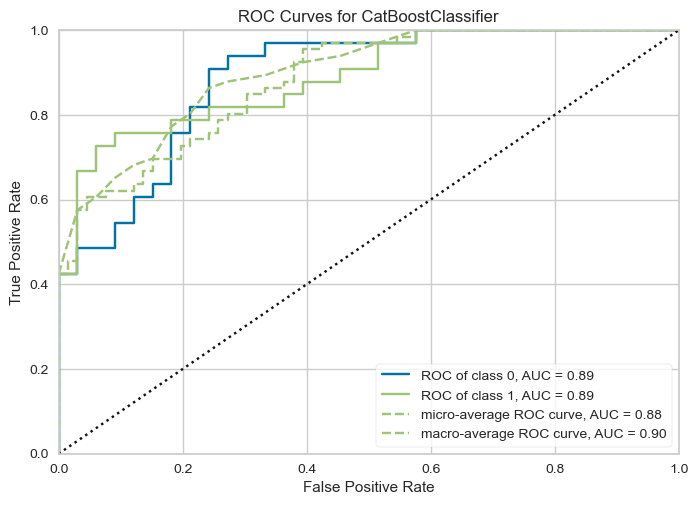

In [15]:
# ROC curve
plot_model(creat_model)

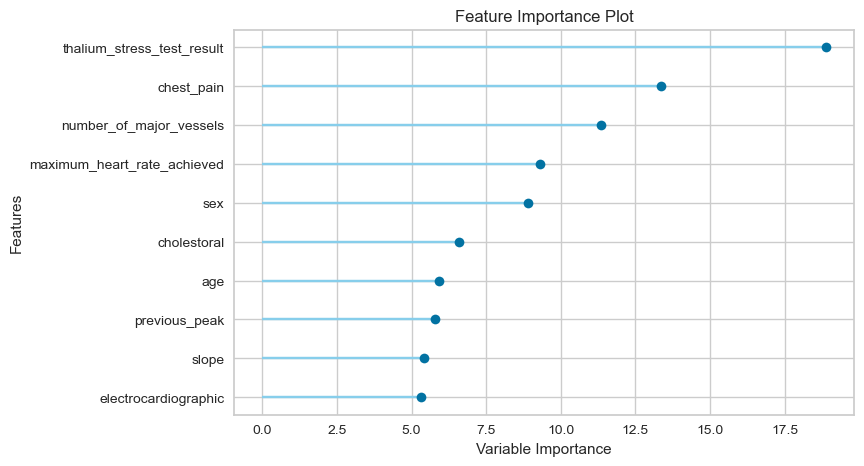

In [16]:
# Importance of features
plot_model(creat_model, plot='feature')

In [17]:
# Saving the model
save_model(creat_model, 'catboost_model');

Transformation Pipeline and Model Successfully Saved


## Model Test

In [18]:
# Loading test data
test_df = pd.read_csv('../Heart_Attack/test_data.csv')
# Divide in X and y
X_test, y_test = divide_X_y(test_df)

In [19]:
# Loading the generated model
creat_model = load_model('catboost_model')

Transformation Pipeline and Model Successfully Loaded


In [20]:
# Predicting on test data
y_pred = creat_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.96      0.79      0.86        28

    accuracy                           0.88        56
   macro avg       0.89      0.88      0.87        56
weighted avg       0.89      0.88      0.87        56



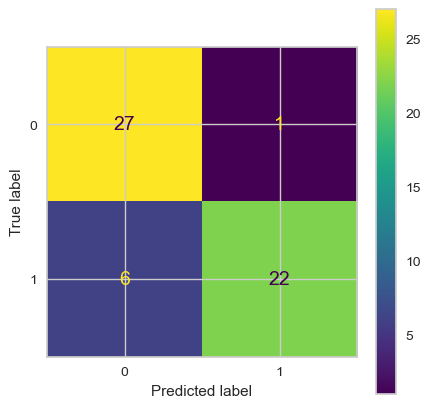

In [22]:
# Model evaluation with precision, recall, F1-score and accuracy
print(classification_report(y_test, y_pred))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred)